# Simple Linear Regression

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
df = pd.read_csv('real_estate_SLR.csv')
df.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Check Data Quality

In [3]:
#Check Size
df.shape

(100, 2)

In [4]:
#Detect Missing Values
df.isnull().sum()

price    0
size     0
dtype: int64

In [5]:
#Trace Duplicated Rows
#Check duplicated rows
df[df.duplicated(keep=False)]

,price,size


In [6]:
#Change Value into 2 decimal places
df['price']=df['price'].round(2)
df.head()

,price,size
0,234314.14,643.09
1,228581.53,656.22
2,281626.34,487.29
3,401255.61,1504.75
4,458674.26,1275.46


## Exploratory Data Analysis

### Univariate Analysis of price

In [7]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470800,853.024200
std,77051.727548,297.941951
min,154282.130000,479.750000
25%,234280.145000,643.330000
50%,280590.720000,696.405000
75%,335723.695000,1029.322500
max,500681.130000,1842.510000


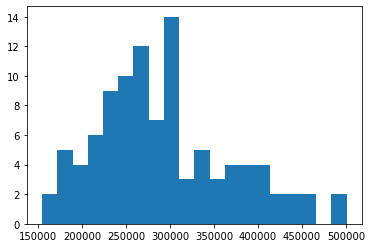

In [8]:
#Distribution of Response Variable
plt.hist(x=df['price'],bins=20)
plt.show()

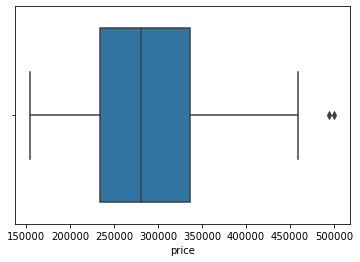

In [9]:
#Box Plot
sns.boxplot(x='price',data=df)
plt.show()

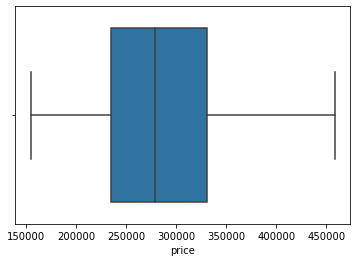

In [10]:
#Removing Outliers
df = df[df['price']<487888]

#Box Plot
sns.boxplot(x='price',data=df)
plt.show()

In [11]:
df.shape

(98, 2)

### Univariate Analysis - size

In [12]:
df['size'].describe()

count      98.000000
mean      836.235408
std       275.295007
min       479.750000
25%       643.170000
50%       694.520000
75%      1026.307500
max      1504.750000
Name: size, dtype: float64

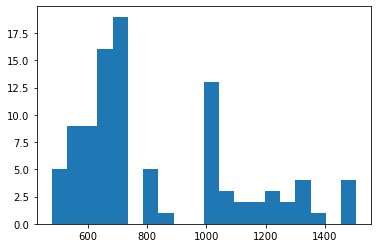

In [13]:
#Distribution of Input
plt.hist(x=df['size'],bins=20)
plt.show()

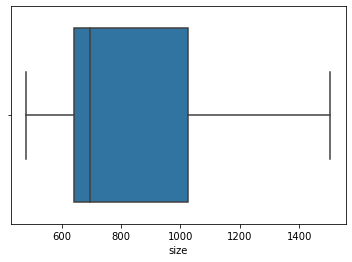

In [14]:
#Box Plot
sns.boxplot(x='size',data=df)
plt.show()

### Multivariate Analysis - price vs size

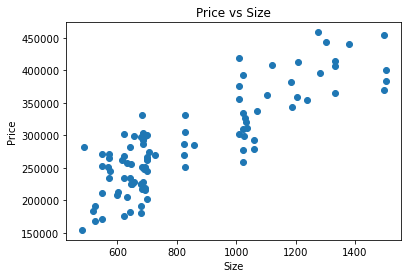

In [15]:
plt.scatter(df['size'],df['price'])
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [16]:
df.corr()

,price,size
price,1.000000,0.842273
size,0.842273,1.000000


## Assign Input and Output Variable

In [17]:
df.columns

Index(['price', 'size'], dtype='object')

In [18]:
#Rearranging the Dataframe
df = df[['size','price']]
df.head()

,size,price
0,643.09,234314.14
1,656.22,228581.53
2,487.29,281626.34
3,1504.75,401255.61
4,1275.46,458674.26


In [19]:
#General Slicing & Accessing Variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Partitioning

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Training Algorithm

In [21]:
#Train the Ordinary Least Squared (OLS) algorithm
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
reg_model = sm.OLS(y_train,x_train).fit()

## Model Validation

### a) Using R-Squared coefficient value

In [22]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.56e-22
Time:                        19:17:00   Log-Likelihood:                -932.63
No. Observations:                  78   AIC:                             1869.
Df Residuals:                      76   BIC:                             1874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.051e+05   1.38e+04      7.588      0.000    7.75e+04    1.33e+05
size         217.6704     15.684     13.878      0.000     186.433     248.908
==============================================================================
Omnibus:                        4.409   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                2.383
Skew:                           0.165   Prob(JB):                        0.304
Kurtosis:                       2.210   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b) Correlation between Predicted Output vs Actual Output

In [23]:
#Apply the Model using Test set
x_test = sm.add_constant(x_test)
y_pred = reg_model.predict(x_test) #Predict the output

In [24]:
x_test.head()

,const,size
27,1.0,1334.10
87,1.0,1028.41
2,1.0,487.29
57,1.0,1283.85
70,1.0,1021.95


In [25]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'size':x_test['size'],'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted'].round(2)
df_validate=df_validate.set_index('size')
df_validate.head(10)

,Actual,Predicted
size,,
1334.10,406852.30,395483.62
1028.41,327252.11,328943.95
487.29,281626.34,211158.14
1283.85,395242.10,384545.68
1021.95,276875.63,327537.80
685.48,303597.22,254298.24
623.94,234178.16,240902.80
681.07,180307.22,253338.31
1032.06,320345.52,329738.45


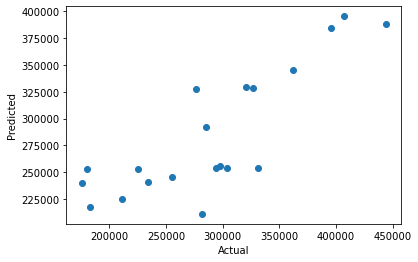

In [26]:
plt.scatter(df_validate['Actual'],df_validate['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [27]:
df_validate.corr().round(2)

,Actual,Predicted
Actual,1.00,0.83
Predicted,0.83,1.00


## Apply Model with New Data

In [28]:
#What is the property price if size = 700 & 800
df_input = pd.DataFrame({'size':[700,800]})

x_input = sm.add_constant(df_input)
reg_model.predict(x_input).round(2)

0    257458.81
1    279225.85
dtype: float64

## Plotting the Model in Scatter Plot

In [29]:
x_graph = sm.add_constant(df['size'])
y_graph = reg_model.predict(x_graph).round(2)
y_graph = pd.DataFrame({'x':df['size'],'y':y_graph})
y_graph.head()

,x,y
0,643.09,245071.19
1,656.22,247929.20
2,487.29,211158.14
3,1504.75,432629.07
4,1275.46,382719.42


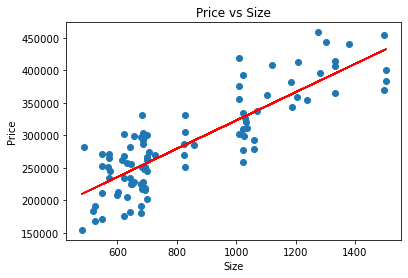

In [30]:
plt.scatter(df['size'],df['price'])
plt.plot(y_graph['x'],y_graph['y'],color='red')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Multiple Linear Regression

## Import Dataset & EDA

In [31]:
# Import Dataset
df = pd.read_csv('real_estate_MLR.csv')
df['price']=df['price'].round(2)
df.head(10)

,price,size,view
0,234314.14,643.09,garden view
1,228581.53,656.22,garden view
2,281626.34,487.29,sea view
3,401255.61,1504.75,garden view
4,458674.26,1275.46,sea view
5,245050.28,575.19,sea view
6,265129.06,570.89,sea view
7,175716.48,620.82,garden view
8,331101.34,682.26,sea view
9,218630.61,694.52,garden view


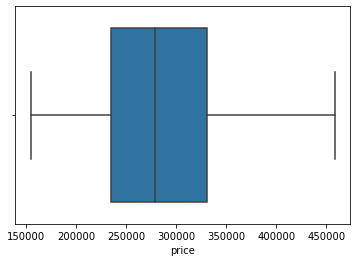

In [32]:
#Removing Outliers
df = df[df['price']<487888]

#Box Plot
sns.boxplot(x='price',data=df)
plt.show()

In [33]:
#Check classes in view
df['view'].value_counts()

garden view    51
sea view       47
Name: view, dtype: int64

## Feature Selection with Multivariate Analysis: price vs view

In [34]:
#Compute the mean price of each class in view
meanPrice_view = df.groupby('view',as_index=False)['price'].mean()
round(meanPrice_view,2)

,view,price
0,garden view,261186.23
1,sea view,317297.64


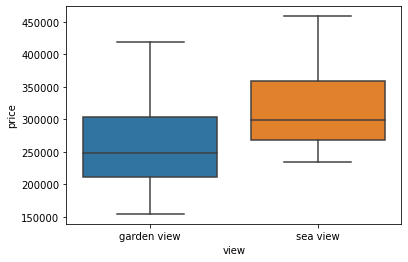

In [35]:
#Compare the price difference between No sea view and Sea view
sns.boxplot(x='view',y='price',data=df)
plt.show()

## Assign Input and Output Variable

In [36]:
df.columns

Index(['price', 'size', 'view'], dtype='object')

In [37]:
#Rearranging the Dataframe
df = df[['size','view','price']]
df.head()

,size,view,price
0,643.09,garden view,234314.14
1,656.22,garden view,228581.53
2,487.29,sea view,281626.34
3,1504.75,garden view,401255.61
4,1275.46,sea view,458674.26


In [38]:
#General Slicing & Accessing Variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
x.head(6)

,size,view
0,643.09,garden view
1,656.22,garden view
2,487.29,sea view
3,1504.75,garden view
4,1275.46,sea view
5,575.19,sea view


## Handling Categorical Features

In [40]:
#Transform Categorical Features to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)
x.head(6)

,size,view_sea view
0,643.09,0
1,656.22,0
2,487.29,1
3,1504.75,0
4,1275.46,1
5,575.19,1


## Partitioning

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train.head()

,size,view_sea view
44,1060.36,0
64,685.48,1
3,1504.75,0
90,694.52,0
46,633.19,0


## Feature Scaling for Train Set

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)

## Training Algorithm

In [44]:
#Train the Ordinary Least Squared (OLS) algorithm
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
reg_model = sm.OLS(y_train,x_train).fit()

## Model Validation

### a) Using R-Squared coefficient value

In [45]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.76e-34
Time:                        19:17:01   Log-Likelihood:                -901.51
No. Observations:                  78   AIC:                             1809.
Df Residuals:                      75   BIC:                             1816.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.877e+05   2922.253     98.446      0.000    2.82e+05    2.94e+05
x1          6.213e+04   2930.342     21.202      0.000    5.63e+04     6.8e+04
x2          2.805e+04   2930.342      9.571      0.000    2.22e+04    3.39e+04
==============================================================================
Omnibus:                       28.567   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.067
Skew:                           1.127   Prob(JB):                     4.11e-18
Kurtosis:                       7.422   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b) Correlation between Predicted Output vs Actual Output

In [46]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test =  scaler.transform(x_test)

In [47]:
#Apply the Model using Test set
x_test = sm.add_constant(x_test)
y_pred = reg_model.predict(x_test) #Predict the output

In [48]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted'].round(2)
df_validate.head(10)

,Actual,Predicted
27,406852.30,430308.35
87,327252.11,361461.15
2,281626.34,239590.65
57,395242.10,418991.09
70,276875.63,303616.98
84,303597.22,284226.81
17,234178.16,270366.83
80,180307.22,226844.33
56,320345.52,305893.94
68,294582.94,284226.81


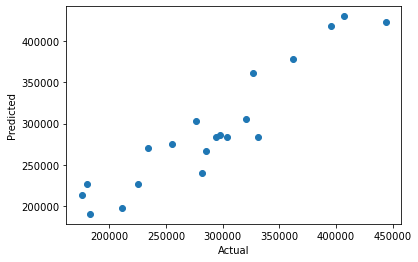

In [49]:
plt.scatter(df_validate['Actual'],df_validate['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [50]:
df_validate.corr().round(2)

,Actual,Predicted
Actual,1.00,0.93
Predicted,0.93,1.00


## Save the Model & Parameter

In [51]:
#Save the Model
import pickle

filename = 'reg_model.sav' #Assigning name to the model

#Write it to the file
pickle.dump(reg_model, open(filename,'wb')) #wb - write binary

In [52]:
#Save the Scaler Parameter
import joblib
joblib.dump(scaler,'scaler_reg.save')

['scaler_reg.save']

## Model Deployment

In [53]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

In [54]:
#Load Model
filename = 'reg_model.sav'
reg_model = pickle.load(open(filename,'rb')) #rb - read binary

In [55]:
#Load Scaler Parameter
scaler = joblib.load('scaler_reg.save')

#What is the property price if size = 700 & 800
df_input = pd.DataFrame({'size':[700,800,900],'view_sea view':[0,0,1]})

x_input =  x_scaler.transform(df_input)

x_input = sm.add_constant(x_input)
y_output = reg_model.predict(x_input).round(2)
y_output